# Numerical Experiments for "A Probabilistic Numerical Extension of the Conjugate Gradient Method"

This notebook documents how the plots in the paper were produced. 

This notebook depends on the following files being in the same directory:
- plots.py
- utilities.py
- bayescg_k.py
- cgqs.py
- bsstk18_prec.mtx

Run all cells to replicate the plots in the paper. The commands that save the plots are commented out.


In [1]:
from plots import * 
from utilities import *
import numpy as np

from scipy.io import mmread
from time import time


## Numerical Experiments

### First Problem

#### Setup

We generate a problem for the first numerical experiment. The $\mathbf{A}$ is a random $n = 48$ symmetric positive definite matrix with the eigenvalue distribution $$\lambda_i = 10^4 + \frac{i-1}{48-1}(1000-0.1)(0.9)^{48-i}.$$ This eigenvalue distribution is originally from (Strakos, 1991). The solution vector is the vector of all ones and the initial guess is the vector of all zeros, that is $$\mathbf{x}_*=1 \qquad \text{and} \qquad \mathbf{x}_0 = 0.$$

The Gauss-Radau error estimate in this experiment is the Gauss-Radau upper bound computed with CGQ from (Meurant and Tichy, 2013). The Gauss-Radau error bound requires a lower bound for the smallest eigenvalue of $\mathbf{A}$, so we use $9.999\times 10^{-2}$ as the lower bound for $0.1$.

In [2]:
np.random.seed(1)

N = 48

A,_,_,min_eig,max_eig = random_matrix_generator(N,5,1)
CondA = max_eig/min_eig
NormA = max_eig
GR = min_eig*.9999
#GR = None

def AVec(w):
    return A@w


xTrue = np.ones(N)
b = AVec(xTrue)
x0 = np.zeros(N)

#### Running experiments and plotting results

"\nplt.figure(1)\nplt.savefig('../../NumericalPaperImages/48S.pdf')\nplt.figure(2)\nplt.savefig('../../NumericalPaperImages/48Conf.pdf')\nplt.figure(3)\nplt.savefig('../../NumericalPaperImages/48CG.pdf')\nplt.figure(4)\nplt.savefig('../../NumericalPaperImages/48Err.pdf')\nplt.figure(6)\nplt.savefig('../../NumericalPaperImages/48Comp.pdf')\n"

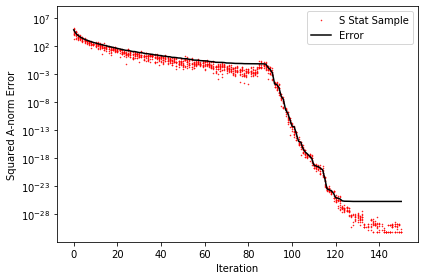

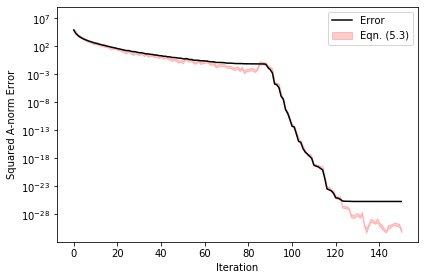

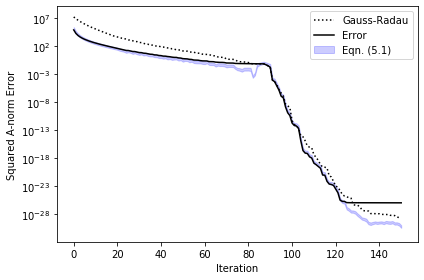

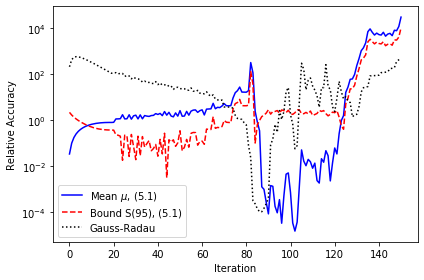

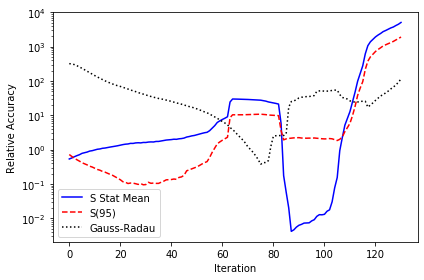

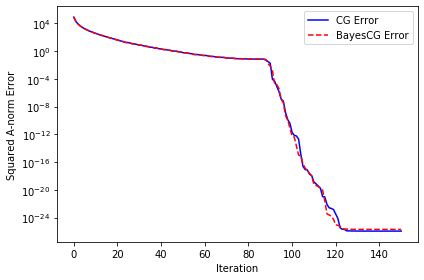

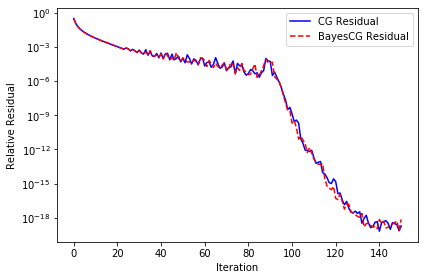

In [3]:
#Delay
d = 4

#Iterations
it = 150

#First iterations to zoom in on
it_z = None

#S statistic samples per iteration
samples = 10

#Percent in credible interval
pct = 95

#Iterations in moving average comparing error estimates
MA = 20

#Whether to reotrhogonalize
reorth = False

# Running the experiments
bayescg_exp_plots(AVec,b,x0,NormA,xTrue,GR,it,it_z,d,samples,pct,MA,reorth,plt_title=False)

# Paper Specific Labels
label1 = ['Error','Eqn. (5.3)']
label2 = ['Gauss-Radau','Error','Eqn. (5.1)']
label3 = ['Mean $\mu$, (5.1)','Bound S(95), (5.1)','Gauss-Radau']

plt.figure(2)
plt.legend(label1)
plt.figure(3)
plt.legend(label2)
plt.figure(4)
plt.legend(label3)

'''
plt.figure(1)
plt.savefig('../../NumericalPaperImages/48S.pdf')
plt.figure(2)
plt.savefig('../../NumericalPaperImages/48Conf.pdf')
plt.figure(3)
plt.savefig('../../NumericalPaperImages/48CG.pdf')
plt.figure(4)
plt.savefig('../../NumericalPaperImages/48Err.pdf')
plt.figure(6)
plt.savefig('../../NumericalPaperImages/48Comp.pdf')
'''


### Second Problem

#### Setup

The setup of the second numerical experiment is largely the same as the first one.

The matrix in this experiment is the sparse matrix $\mathbf{A} = \mathbf{L}^{-1}\mathbf{B}\mathbf{L}^{-T}$ of dimension $n  = 11948$, a preconditioned version of $\mathbf{B}$, the matrix "BCSSTK18" from the Matrix Market, where $\mathbf{L}$ is its shifted incomplete Cholesky factor with threshold dropping.

The Gauss-Radau estimate in this experiment is the approximation of the Gauss-Radau upper bound from (Meurant and Tichy, 2019).

We have included a file, "bcsstk18_prec.mtx' that contains the preconditioned matrix. We also include the files 'bcsstk18.mtx' and 'bcsstk18_ichol.mtx' which are the matrix and preconditioner respectively. The original matrix can also be found at: (https://math.nist.gov/MatrixMarket/data/Harwell-Boeing/bcsstruc2/bcsstk18.html)


In [4]:
A = mmread('bcsstk18_prec.mtx')

N = 11948


def AVec(w):
    return A.dot(w)


GR = None
#GR = 9e-14

xTrue = np.ones(N)
b = AVec(xTrue)
x0 = np.zeros(N)

NormA = None


#### Running experiments and plotting results

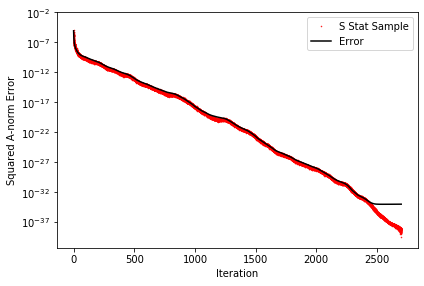

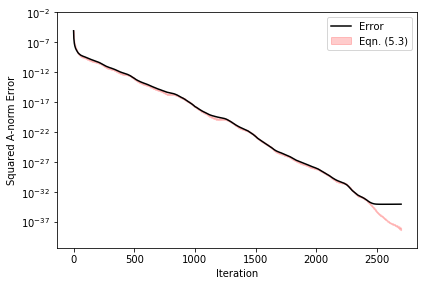

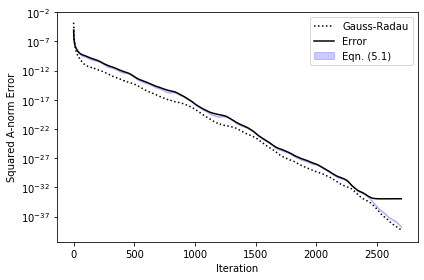

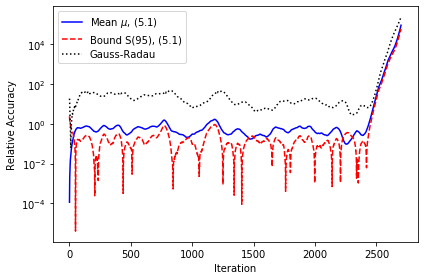

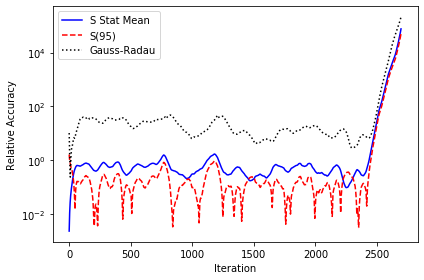

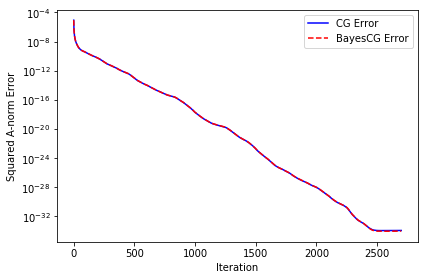

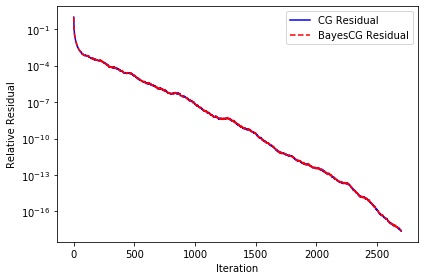

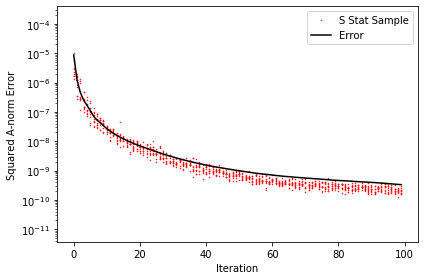

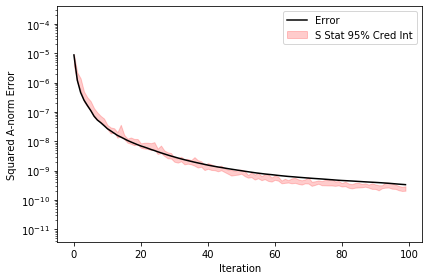

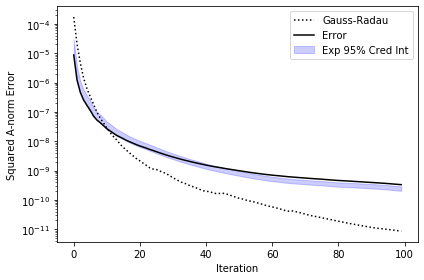

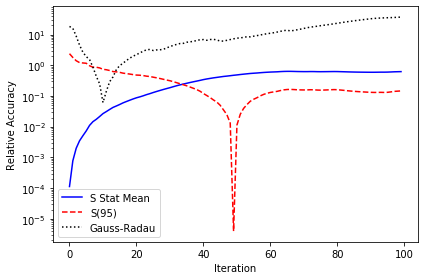

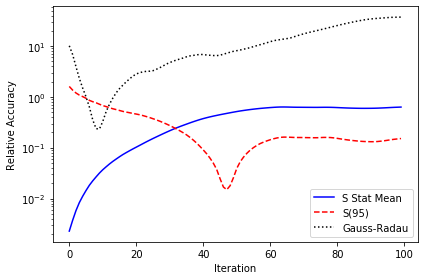

In [5]:
#Delay
d = 50

#Iterations
it = 2700

#First iterations to zoom in on
it_z = 100

#S statistic samples per iteration
samples = 10

#Percent in credible interval
pct = 95

#Iterations in moving average comparing error estimates
MA = 5

#Whether to reotrhogonalize
reorth = False

# Running the experiments
bayescg_exp_plots(AVec,b,x0,NormA,xTrue,GR,it,it_z,d,samples,pct,MA,reorth,plt_title=False)

# Paper Specific Labels
label1 = ['Error','Eqn. (5.3)']
label2 = ['Gauss-Radau','Error','Eqn. (5.1)']
label3 = ['Mean $\mu$, (5.1)','Bound S(95), (5.1)','Gauss-Radau']

plt.figure(2)
plt.legend(label1)
plt.figure(3)
plt.legend(label2)
plt.figure(4)
plt.legend(label3)

'''
plt.figure(1)
plt.savefig('../../NumericalPaperImages/BigS.pdf')
plt.figure(2)
plt.savefig('../../NumericalPaperImages/BigConf.pdf')
plt.figure(3)
plt.savefig('../../NumericalPaperImages/BigCG.pdf')
plt.figure(4)
plt.savefig('../../NumericalPaperImages/BigErr.pdf')
'''



## References

Z. Strakos, *On the real convergence rate of the conjugate gradient method*, Linear Algebra
Appl., 154/156 (1991), pp. 535–549, https://doi.org/10.1016/0024-3795(91)90393-B.

G. Meurant and P. Tichy, *On computing quadrature-based bounds for the A-norm of the error in conjugate gradients*, Numer. Algorithms, 62 (2013), pp. 163–191, https://doi.org/10.1007/s11075-012-9591-9.

G. Meurant and P. Tichy, *Approximating the extreme Ritz values and upper bounds for the A-norm of the error in CG*, Numer. Algorithms, 82 (2019), pp. 937–968, https://doi.org/10.1007/s11075-018-0634-8.
